In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import pandas as pd
%matplotlib inline

In [200]:
mainModelCmap = cm.get_cmap('Set1')
statusAndFlagsColors = {
    'I': mainModelCmap(0),  # red
    'S': mainModelCmap(1),  # blue
    'R': mainModelCmap(2),  # green
    'D': 'black',

    'IsInfected': mainModelCmap(0),  # red
    'WasInfected': mainModelCmap(0),  # red
    'WasDiagnosed': mainModelCmap(4),  # blue
    'Diagnosed': mainModelCmap(4),  # orange
    'Hospitalized': mainModelCmap(6),  # brown
    'WasHospitalized': mainModelCmap(6),
    'WasICUed': mainModelCmap(7),
    'ICUed': mainModelCmap(7),  # pink
}


locationsCmap1 = cm.get_cmap('Dark2')  # for our locations
locationsCmap2 = cm.get_cmap('tab20')
locationTypeColors = {
    'home': locationsCmap1(0),  # aquamarine
    'public': locationsCmap1(2),  # purple-blue
    'work': locationsCmap1(3),  # deep pink
    'hospital': locationsCmap1(5),  # mustard yellow
    'school': locationsCmap2(17),  # olive green - khaki
    'morgue': locationsCmap1(7)  # gray
}

In [452]:
plt.style.library

{'_classic_test_patch': RcParams({'text.kerning_factor': 6, 'ytick.alignment': 'center_baseline'}),
 'seaborn-dark': RcParams({'axes.axisbelow': True,
           'axes.edgecolor': 'white',
           'axes.facecolor': '#EAEAF2',
           'axes.grid': False,
           'axes.labelcolor': '.15',
           'axes.linewidth': 0.0,
           'figure.facecolor': 'white',
           'font.family': ['sans-serif'],
           'font.sans-serif': ['Arial',
                               'Liberation Sans',
                               'DejaVu Sans',
                               'Bitstream Vera Sans',
                               'sans-serif'],
           'grid.color': 'white',
           'grid.linestyle': '-',
           'image.cmap': 'Greys',
           'legend.frameon': False,
           'legend.numpoints': 1,
           'legend.scatterpoints': 1,
           'lines.solid_capstyle': 'round',
           'text.color': '.15',
           'xtick.color': '.15',
           'xtick.direction': 'o

In [3]:
os.listdir('server_data/outputs')

['close_all_reopen_school_start_3_700.000',
 'close_all_IF03_disobedience_0.250',
 'no_mitigation_IF_030_ri',
 'close_all_IF03_start_2_250.000',
 'close_all_reopen_all_IF03_start_3_450.000',
 'no_mitigation_infectivity_0.210',
 'close_public_school',
 'no_mitigation_IF_020_ri',
 'close_all_reopen_all_IF03_start_3_750_5x_1reinfection_every_100h_starting_at_800',
 'no_mitigation_IF_045_ri',
 'close_all_reopen_work',
 'no_mitigation_if03',
 'close_all_IF03_disobedience_0.400',
 'close_all_reopen_all_IF03_start_3_650.000',
 'close_all_reopen_school_IF03_start_3_350.000',
 'no_mitigation_IF_010_ri',
 'close_all_reopen_school_start_3_1100.000',
 'close_all',
 'close_all_reopen_school_start_3_500.000',
 'close_all_reopen_school_IF03_start_3_750.000',
 'close_all_IF03_start_2_450.000',
 'no_mitigation_IF_035_ri',
 'no_mitigation_IF_050_ri',
 'no_mitigation_doctors01_medics02',
 '.DS_Store',
 'close_all_reopen_work_IF03_None_1.000',
 'no_mitigation_IF05_scan_worlds',
 'no_mitigation_IF_030',
 '

In [431]:
filenames = os.listdir('server_data/outputs/')

In [446]:
folder='server_data/outputs/'
folders = ['no_mitigation_infectivity_0.300',
           'no_mitigation_infectivity_0.150',
           'close_all_IF03_None_1.000',
           'close_all_IF03_disobedience_0.250',
           'close_all_reopen_all_IF03_start_3_500.000',
           'close_all_reopen_all_IF03_start_3_750_5_reinfections_at_1000',
           'close_all_reopen_school_IF03_start_3_450.000',
           'close_all_reopen_school_IF03_start_3_450.000_5reinfections_at_1000',
           'close_all_reopen_work_IF03_None_1.000']
names = ['Infectivity 0.30',
         'Infectivity 0.15',
         'Lockdown',
         'Non-compliance',
         'Reopen All',
         'Reopen All and Reinfection',
         'Reopen School',
         'Reopen School and Reinfection',
         'Reopen Work']


#names =['Lockdown',
#        'Lockdown, Reopen All',
#        'Lockdown, Reopen Public',
#        'Lockdown, Reopen School',
#        'Lockdown, Reopen Work',
#        'Infectivity 0.3',
#        'Infectivity 0.15',]

scenarios = dict(zip(folders,names))

In [445]:
scenarios

{'no_mitigation_infectivity_0.300': 'Infectivity 0.30',
 'no_mitigation_infectivity_0.150': 'Infectivity 0.15',
 'close_all_IF03_None_1.000': 'Lockdown',
 'close_all_IF03_disobedience_0.250': 'Non-compliance',
 'close_all_reopen_all_IF03_start_3_500.000': 'Reopen All',
 'close_all_reopen_all_IF03_start_3_750_5_reinfections_at_1000': 'Reopen ALL and Reinfaction',
 'close_all_reopen_school_IF03_start_3_450.000': 'Reopen School',
 'close_all_reopen_school_IF03_start_3_450.000_5reinfections_at_1000': 'Reopen School and Reinfaction',
 'close_all_reopen_work_IF03_None_1.000': 'Reopen Work'}

def plot_stat_para(ax, folder_scenerario):
    for stat in ['S','I','R','D']:
        df_stat = pd.read_csv('server_data/outputs/'+folder_scenerario+'/'+folder_scenerario+'_'+stat+'.csv')
        df_stat.drop('time',axis=1,inplace=True)
        df_stat.plot(legend=False,alpha=0.1, c=statusAndFlagsColors[stat], ax=ax)
    ax.set_ylabel('People')
    ax.set_xlabel('Time, [hours]')
    

In [89]:
def plot_stat_para(ax, folder_scenario, statii=['S','I','R','D'], log=False):
    for stat in statii:
        df_stat = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_'+stat+'.csv')
        df_stat.drop('time',axis=1,inplace=True)
        if not stat.startswith('c'):
            df_stat.plot(legend=False,alpha=0.1, c=statusAndFlagsColors[stat], ax=ax)
        else:
            df_stat.plot(legend=False,alpha=0.1, c=statusAndFlagsColors[stat[10:]], ax=ax)
    ax.set_ylabel('People')
    ax.set_xlabel('Time [hours]')
    if log:
        ax.set_yscale('log')

In [101]:
def plot_stat_para_mean(ax, folder_scenario, statii=['S','I','R','D'], log=False, alpha=0.1, label=False, ci=False):
    for stat in statii:
        df_stat = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_'+stat+'.csv')
        df_stat.drop('time',axis=1,inplace=True)
        if not label:
            label = folder_scenario
        if not stat.startswith('c'):
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat], ax=ax, label=label)
        else:
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat[10:]], ax=ax, label=label)
    ax.set_ylabel('People')
    ax.set_xlabel('Time [hours]')
    if log:
        ax.set_yscale('log')
        

['no_mitigation_infectivity_0.300', 'no_mitigation_infectivity_0.150', 'close_all_IF03_None_1.000', 'close_all_IF03_disobedience_0.250', 'close_all_reopen_all_IF03_start_3_500.000', 'close_all_reopen_all_IF03_start_3_750_5_reinfections_at_1000', 'close_all_reopen_school_IF03_start_3_450.000', 'close_all_reopen_school_IF03_start_3_450.000_5reinfections_at_1000', 'close_all_reopen_work_IF03_None_1.000']


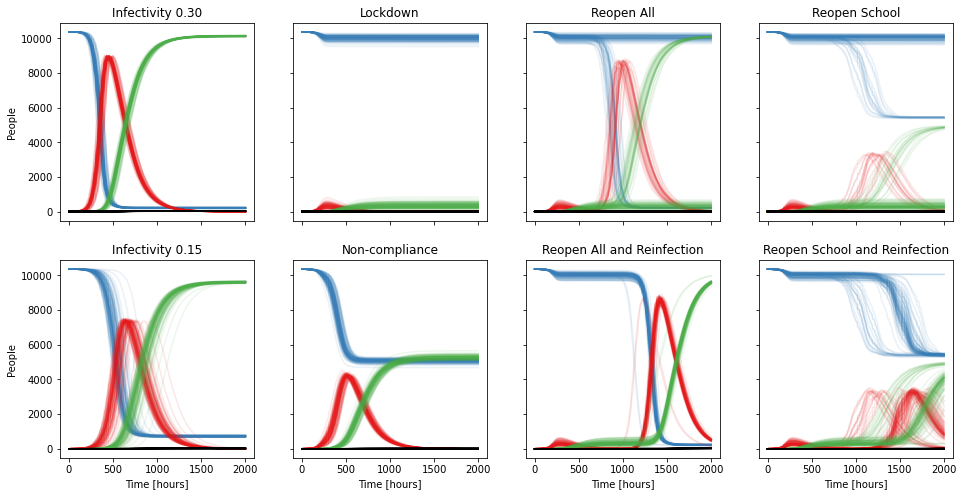

In [449]:
fig, axes = plt.subplots(2,4,figsize=(16,8), sharey=True, sharex=True)

for n,folder_scenario in enumerate(folders[:-1]):
    col = int(n/2)
    row = n%2
    ax1=axes[row][col]
    plot_stat_para(ax1, folder_scenario)
    ax1.set_title(scenarios[folder_scenario])
plt.savefig('fig3.svg')
print(folders)

In [ ]:
def plot_stat_para_mean_ci(ax, folder_scenario, statii=['S','I','R','D'], log=False, alpha=0.1, label=False):
    for stat in statii:
        df_stat = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_'+stat+'.csv')
        df_stat.drop('time',axis=1,inplace=True)
        if not label:
            label = folder_scenario
        if not stat.startswith('c'):
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat], ax=ax, label=label)
            df_stat.std(axis=1)
        else:
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat[10:]], ax=ax, label=label)
    ax.set_ylabel('People')
    ax.set_xlabel('Time [hours]')
    if log:
        ax.set_yscale('log')
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.05)

In [440]:
scenarios[folder_scenario]

'Infectivity 0.15'

#### disobedience

In [254]:
disob_folders = [x for x in filenames if x.startswith('close_all_IF03_disobedience_')] 

In [299]:
disob={}
for folder_scenario in  disob_folders:
    df = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_cumulativ_WasInfected.csv')
    df.drop('time',axis=1,inplace=True)
    disob[float(folder_scenario[-5:])] =df.iloc[-1].values
df_disob = pd.DataFrame(disob)

In [300]:
col1 = list(disob.keys())
col1.sort()


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabels'

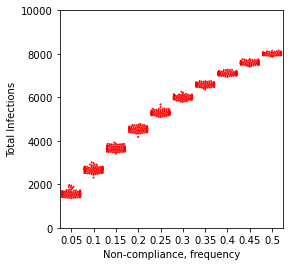

In [311]:
#df_disob.violin(column = d)
plt.figure(figsize=(4,4))
sns.swarmplot(data = df_disob[col1], color='r', size=2)
plt.ylabel('Total Infections')
plt.xlabel('Non-compliance, frequency')
plt.savefig('non_compliant.svg')
plt.ylim(0,10000)


### infectivity

In [257]:
inf_folders = [x for x in filenames if x.startswith('no_mitigation_infectivity_')] 

In [258]:
infectivity={}
for folder_scenario in  inf_folders:
    df = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_cumulativ_WasInfected.csv')
    df.drop('time',axis=1,inplace=True)
    infectivity[float(folder_scenario[-5:])] =df.iloc[-1].values
df_inf = pd.DataFrame(infectivity)

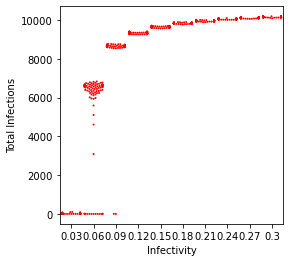

In [259]:
col2 = list(df_inf.keys())
col2.sort()
plt.figure(figsize=(4,4))
sns.swarmplot(data = df_inf[col2], color='r', size=2)
plt.ylabel('Total Infections')
plt.xlabel('Infectivity')
plt.savefig('non_compliant.svg')


### close all at t

In [260]:
close_folders = [x for x in filenames if x.startswith('close_all_IF03_start_2_')] 


In [261]:
close_all={}
for folder_scenario in  close_folders:
    df = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_cumulativ_WasInfected.csv')
    df.drop('time',axis=1,inplace=True)
    close_all[float(folder_scenario[-7:])] =df.iloc[-1].values
df_close_all = pd.DataFrame(close_all)

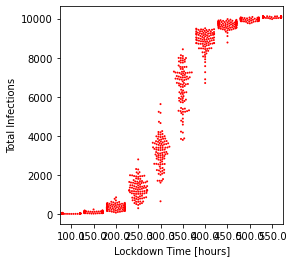

In [262]:
col3 = list(df_close_all.keys())
col3.sort()
plt.figure(figsize=(4,4))
sns.swarmplot(data = df_close_all[col3], color='r', size=2)
plt.ylabel('Total Infections')
plt.xlabel('Lockdown Time [hours]')
plt.savefig('Lockdown Time.svg')

### reopen

In [263]:
reopen_all_folders = [x for x in filenames if x.startswith('close_all_reopen_all_IF03_start_3_') and len(x)==41] 

In [264]:
reopen_all={}
for folder_scenario in  reopen_all_folders:
    df = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_cumulativ_WasInfected.csv')
    df.drop('time',axis=1,inplace=True)
    reopen_all[float(folder_scenario[-7:])] =df.iloc[-1].values
df_reopen_all = pd.DataFrame(reopen_all)

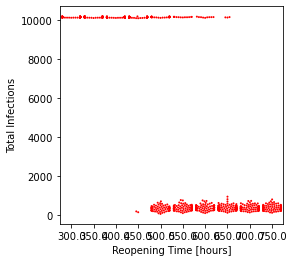

In [265]:
col4 = list(df_reopen_all.keys())
col4.sort()
plt.figure(figsize=(4,4))
sns.swarmplot(data = df_reopen_all[col4], color='r', size=2)
plt.ylabel('Total Infections')
plt.xlabel('Reopening Time [hours]')
plt.savefig('Reopening_Time.svg')

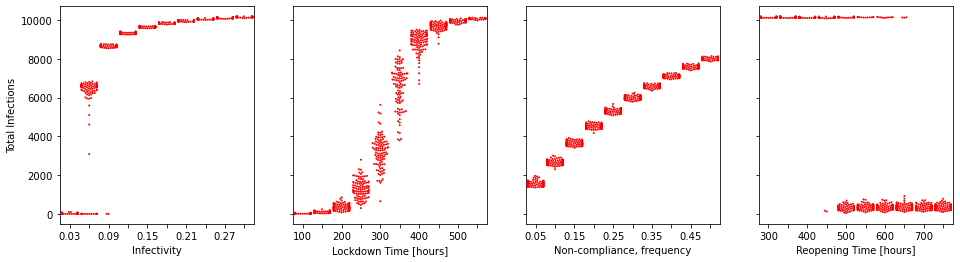

In [391]:
fig, axes = plt.subplots(1,4,figsize=(16,4), sharey=True)

sns.swarmplot(data = df_reopen_all[col4], color='r', size=2, ax=axes[3])
axes[3].set_xlabel('Reopening Time [hours]')
axes[3].set_xticklabels([int(x) if col4.index(x)%2==0 else None for x in col4])

sns.swarmplot(data = df_close_all[col3], color='r', size=2, ax=axes[1])
axes[1].set_xlabel('Lockdown Time [hours]')
axes[1].set_xticklabels([int(x) if col3.index(x)%2==0 else None for x in col3])

sns.swarmplot(data = df_inf[col2], color='r', size=2, ax=axes[0])
axes[0].set_ylabel('Total Infections')
axes[0].set_xlabel('Infectivity')
axes[0].set_xticklabels([x if col2.index(x)%2==0 else None for x in col2])

sns.swarmplot(data = df_disob[cols1], color='r', size=2, ax=axes[2])
axes[2].set_xlabel('Non-compliance, frequency')
axes[2].set_xticklabels([x if col1.index(x)%2==0 else None for x in col1])
#axes[2].xaxis.set_major_locator(plt.MaxNLocator(5))
#axes[2].set_xticklabels([x for x in col2 if col2.index(x)%2==1])

plt.savefig('para_results.svg')


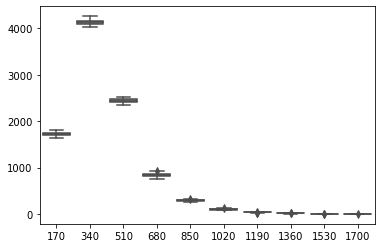

In [406]:
df_dur = pd.read_csv('server_data/outputs/'+'no_mitigation_if03'+'/'+'no_mitigation_if03' + '_' + dur_list[0]  + '.csv')
df_dur.drop('Unnamed: 0',axis=1, inplace=True)
df_dur.columns =[int(float(x)) for x in list(df_dur.columns)]
sns.boxplot(data=df_dur, color='gray')#,size=2)

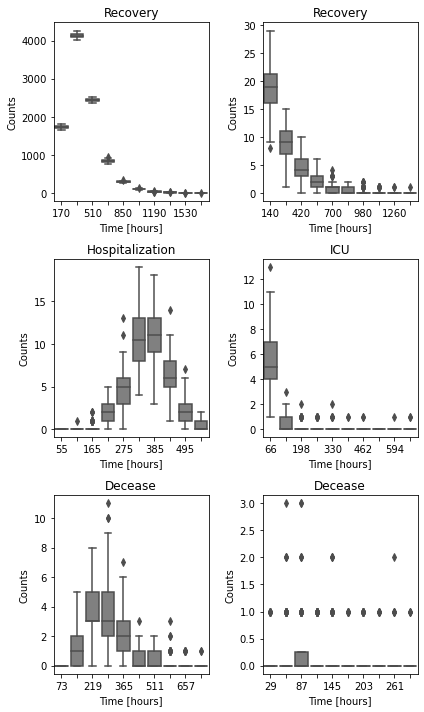

In [427]:
dur_list = ['infection_to_recovery', 'infection_to_hospital', 'infection_to_death', 'hospital_to_recovery', 'hospital_to_icu', 'hospital_to_death']
dur_titels = ['Recovery', 'Hospitalization', 'Decease', 'Recovery', 'ICU', 'Decease']

dur_dict = dict(zip(dur_list, dur_titels))
fig, axes = plt.subplots(3,2, figsize=(6,10))

plt.subplots
for k,dur in enumerate(dur_list):
    col = k%3
    row = int(k/3)
    ax=axes[col][row]
    df_dur = pd.read_csv('server_data/outputs/'+'no_mitigation_if03'+'/'+'no_mitigation_if03' + '_' + dur + '.csv')
    df_dur.drop('Unnamed: 0',axis=1, inplace=True)
    df_dur.columns =[int(float(x)) for x in list(df_dur.columns)]
    sns.boxplot(data=df_dur, color='gray',ax=ax)#size=2,
    ax.set_xticklabels([x if list(df_dur.columns).index(x)%2==0 else None for x in df_dur.columns])
    ax.set_xlabel('Time [hours]')
    ax.set_ylabel('Counts')
    ax.set_title(dur_dict[dur])
    
plt.tight_layout()
plt.savefig('../fig2/durations.svg')

In [383]:
df_loc_stat

,60.0,120.0,180.0,240.0,300.0,360.0,420.0,480.0,540.0,600.0
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0


no_mitigation_infectivity_0.300


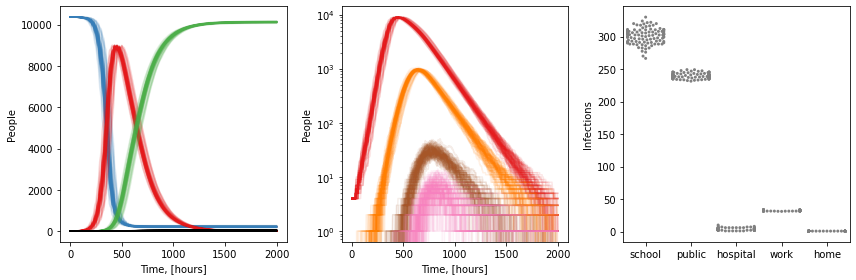

In [418]:
print(folders[1])

folder1 = 'no_mitigation_IF_030'
flags = ['IsInfected','Hospitalized','Diagnosed','ICUed']

fig, axes = plt.subplots(1,3, figsize=(12,4))
ax=axes[0]
plot_stat_para(ax, folders[1])
ax=axes[1]
plot_stat_para(ax, folders[1],statii=flags, log=True)

ax=axes[2]
df_loc_stat = pd.read_csv('server_data/outputs/'+folder1+'/'+folder1+'_infections_per_location_type.csv')
df_loc_stat.drop('Unnamed: 0',axis=1, inplace=True)
sns.swarmplot(data=df_loc_stat, color='gray', ax=ax, size=3)
ax.set_ylabel('Infections')
plt.tight_layout()

plt.savefig('../fig2/fig2_stats.svg')
#df_stat = pd.read_csv('server_data/outputs/'+folders[1]+'/'+folders[1]+'_'+flags[0]+'.csv')
#df_stat.drop('time',axis=1,inplace=True)
#df_stat.plot(ax=axes[1],c=statusAndFlagsColors[flags[0]],legend=False)

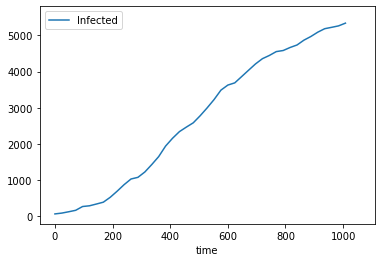

In [82]:
import pandas as pd 
df_data = pd.read_csv('COVID_Daily.csv')

df_data.reset_index(inplace=True)
df_data['time']=df_data['index']*24
df_data.plot(x='time',y='Infected')

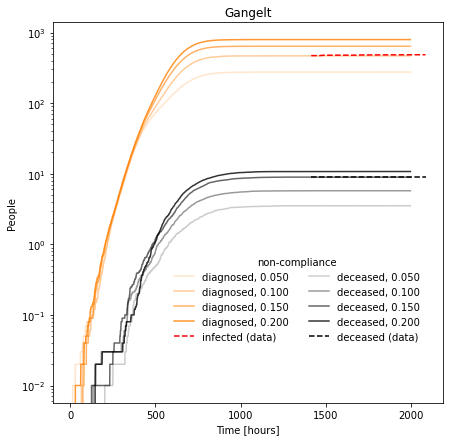

In [202]:
file = 'close_all_IF03_disobedience_0.100'
files = ['close_all_IF03_disobedience_0.050','close_all_IF03_disobedience_0.100','close_all_IF03_disobedience_0.150', 'close_all_IF03_disobedience_0.200']

df_data = pd.read_csv('COVID_Daily_gangelt.csv')
df_data.reset_index(inplace=True)
df_data['Time']=(df_data['time']+59)*24

fig, axes = plt.subplots(1,1, figsize=(7,7), sharey=True, sharex=True)

for k,file in enumerate(files):
    plot_stat_para_mean(axes,file, statii=['cumulativ_WasDiagnosed'], alpha=0.2*(k+1), label = 'diagnosed, '+file[-5:])
axes.plot(df_data['Time'], df_data['Infected'],'r--', label ='infected (data)')

for k,file in enumerate(files):
    plot_stat_para_mean(axes,file, statii=['D'], alpha=0.2*(k+1), label = 'deceased, '+file[-5:])

axes.plot(df_data['Time'], df_data['Dead'],'k--', label = 'deceased (data)')

#df_data.plot(x='time',y=['Infected'], ax=axes, logy=True, color='r')
#df_data.plot(x='time',y=['Dead'], ax=axes, logy=True, color='k')


axes.set_yscale('log')
axes.set_title('Gangelt')
axes.legend(loc=(0.3,0.15), frameon=False, ncol=2, title='non-compliance')
plt.savefig('Gangelt_data.svg')



In [ ]:
def plot_stat_para_mean_ci(ax, folder_scenario, statii=['S','I','R','D'], log=False, alpha=0.1, label=False):
    for stat in statii:
        df_stat = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_'+stat+'.csv')
        df_stat.drop('time',axis=1,inplace=True)
        if not label:
            label = folder_scenario
        if not stat.startswith('c'):
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat], ax=ax, label=label)
            ax.plot(df_stat)df_stat.std(axis=1)
        else:
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat[10:]], ax=ax, label=label)
    ax.set_ylabel('People')
    ax.set_xlabel('Time [hours]')
    if log:
        ax.set_yscale('log')
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.05)

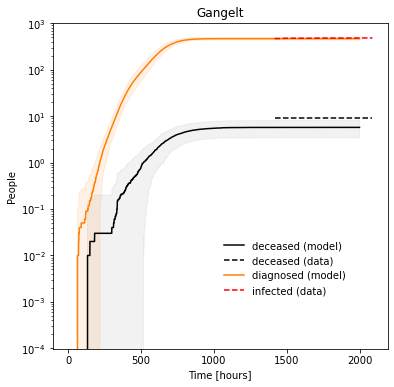

In [198]:
fig, ax = plt.subplots(1,1, figsize=(6,6), sharey=True, sharex=True)


folder_scenario = 'close_all_IF03_disobedience_0.100'

stat = 'D'
df_stat = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_'+stat+'.csv')
df_stat.drop('time',axis=1,inplace=True)
df_stat.mean(axis=1).plot(alpha=1, c=statusAndFlagsColors[stat], ax=ax, label='deceased (model)')

std = df_stat.std(axis=1).values
mean = df_stat.mean(axis=1).values
df_stat['Time']=(df_data['time']+59)*24
ax.fill_between(df_stat.index.values, (mean-std), (mean+std), color='gray', alpha=.1)
ax.plot(df_data['Time'], df_data['Dead'],'k--', label = 'deceased (data)')


###########


stat = 'cumulativ_WasDiagnosed'
df_stat = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_'+stat +'.csv')
df_stat.drop('time',axis=1,inplace=True)
df_stat.mean(axis=1).plot(alpha=1, c=statusAndFlagsColors[stat[10:]], ax=ax, label='diagnosed (model)')

std = df_stat.std(axis=1).values
mean = df_stat.mean(axis=1).values
df_stat['Time']=(df_data['time']+59)*24
ax.fill_between(df_stat.index.values, (mean-std), (mean+std), color=statusAndFlagsColors[stat[10:]], alpha=.1)
ax.plot(df_data['Time'], df_data['Infected'],'r--', label ='infected (data)')

ax.set_yscale('log')
ax.set_title('Gangelt')
ax.legend(loc=(0.5,0.15), frameon=False)
ax.set_ylabel('People')
ax.set_xlabel('Time [hours]')
plt.savefig('Gangelt_data_non_c01.svg')




In [247]:
df_stat[df_stat['WasDiagnosed']>7]

,time,IsInfected,Diagnosed,Hospitalized,ICUed,WasInfected,WasDiagnosed,WasHospitalized,WasICUed
293,293,1374,8,0,0,1419,8,0,0
294,294,1384,8,0,0,1430,8,0,0
295,295,1389,9,0,0,1436,9,0,0
296,296,1391,9,0,0,1439,9,0,0
297,297,1396,9,0,0,1444,9,0,0
...,...,...,...,...,...,...,...,...,...
1995,1995,2,1,0,1,7226,1251,51,0
1996,1996,2,1,0,1,7226,1251,51,0
1997,1997,2,1,0,1,7226,1251,51,0
1998,1998,2,1,0,1,7226,1251,51,0


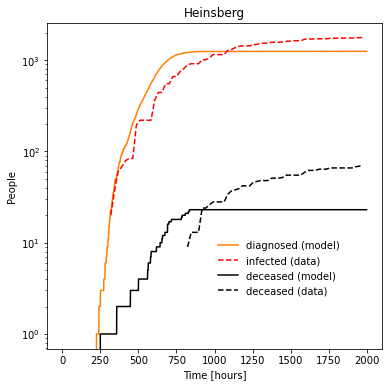

In [251]:
df_stat = pd.read_csv('server_data/heinsberg/HeinsbergFlags.csv')
df_stat_D = pd.read_csv('server_data/heinsberg/HeinsbergDs.csv')
df_data = pd.read_csv('COVID_Daily_heinsberg.csv')
df_data.reset_index(inplace=True)
df_data['Time']=(df_data.index.values+1)*24+295

fig, ax = plt.subplots(1,1, figsize=(6,6), sharey=True, sharex=True)

df_stat.plot(y='WasDiagnosed', color=statusAndFlagsColors['WasDiagnosed'],
             label='diagnosed (model)', ax =ax)
#df_data.plot(x='Time', y='Infected', ax=ax, c='--r', label='infected (data)')
ax.plot(df_data['Time'],df_data['Infected'], '--r',label='infected (data)')

ax.set_yscale('log')

df_stat_D.plot(y='D', color=statusAndFlagsColors['D'],
             label='deceased (model)', ax =ax)
#df_data.plot(x='Time', y='Dead', ax=ax, c='--k', label='deceased (data)')
ax.plot(df_data['Time'],df_data['Dead'], '--k',label='deceased (data)')
ax.set_yscale('log')
ax.set_title('Heinsberg')
ax.legend(loc=(0.5,0.15), frameon=False)
ax.set_ylabel('People')
ax.set_xlabel('Time [hours]')
plt.savefig('Heinsberg_data_non_c01.svg')

In [218]:
df_data

,index,Date,Infected,Recovered,Dead,Sick,Time
0,0,27.02.20,20.0,NaN,NaN,20,1416
1,1,28.02.20,37.0,NaN,NaN,37,1440
2,2,29.02.20,60.0,NaN,NaN,60,1464
3,3,01.03.20,68.0,NaN,NaN,68,1488
4,4,02.03.20,79.0,NaN,NaN,79,1512
...,...,...,...,...,...,...,...
168,168,NaN,NaN,NaN,NaN,0,5448
169,169,NaN,NaN,NaN,NaN,0,5472
170,170,NaN,NaN,NaN,NaN,0,5496
171,171,NaN,NaN,NaN,NaN,0,5520


NameError: name 'x' is not defined

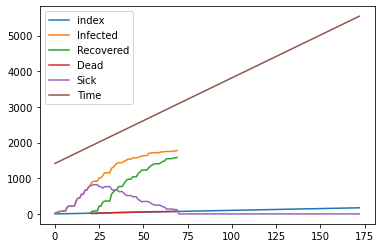

In [213]:
df_data.plot()


ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)